<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Laptop_Rentals_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Rentals

You're given a list of time intervals during which students at a school need a laptop. These time intervals are represented by pairs of integers `[start, end]`, where 0 `<= start < end`. However, `start` and `end` don't represent real times; therefore, they may be greater than `24`.

No two students can use a laptop at the same time, but immediately after a student is done using a laptop, another student can use that same laptop. For example, if one student rents a laptop during the time interval `[0, 2]`, another student can rent the same laptop during any time interval starting with `2`.

Write a function that returns the minimum number of laptops that the school needs to rent such that all students will always have access to a laptop when they need one.

Sample Input

```
times = 
[
  [0, 2],
  [1, 4],
  [4, 6],
  [0, 4],
  [7, 8],
  [9, 11],
  [3, 10],
]
```



Sample Output

```
3
```



# Solution 1

- same as solution 2 but only use normal array instead on minheap. So, it is worse time complexity that soltion 2

In [ ]:
# Time O(nlog(n) + n*labtop)
# Space O(n)

def laptopRentals(times):
  sorted_start_times = sorted(times, key = lambda x: x[0])
  end_time_labtops = []
  for time in sorted_start_times:
    start_time, end_time = time
    max_possible_end_time = 0
    idx_max_possible_end_time = None
    for idx in range(len(end_time_labtops)):
      if end_time_labtops[idx] > start_time:
        continue
      if end_time_labtops[idx] > max_possible_end_time:
        idx_max_possible_end_time = idx
        max_possible_end_time = end_time_labtops[idx]
    if idx_max_possible_end_time == None:
      end_time_labtops.append(end_time)
    else:
      end_time_labtops[idx_max_possible_end_time] = end_time

  return len(end_time_labtops)

In [ ]:
times = [
  [0, 2],
  [1, 4],
  [4, 6],
  [0, 4],
  [7, 8],
  [9, 11],
  [3, 10],
]
laptopRentals(times)

3

In [ ]:
times = [
    [0, 4],
    [2, 3],
    [2, 3],
    [2, 3]
  ]
laptopRentals(times)

4

# Solution 2

In [ ]:
# Time O(nlog(n))
# Space O(n)

def laptopRentals(times):
  sorted_start_times = sorted(times, key = lambda x: x[0])
  end_time_labtops = MinHeap([])

  for time in sorted_start_times:
    start_time, end_time = time
    max_possible_end_time = 0
    idx_max_possible_end_time = None

    if len(end_time_labtops.heap) == 0 or end_time_labtops.peek() > start_time:
      end_time_labtops.insert(end_time)
    else:
      end_time_labtops.remove()
      end_time_labtops.insert(end_time)

  return len(end_time_labtops.heap)

class MinHeap:
  def __init__(self, array):
    self.heap = self.buildHeap(array)

  def buildHeap(self, array):
    last_parent_idx = (len(array) - 2) // 2
    for current_idx in reversed(range(last_parent_idx + 1)):
      self.sift_down(current_idx, len(array) - 1, array)
    return array

  def sift_down(self, current_idx, end_idx, heap):
    child_one_idx = current_idx * 2 + 1
    while child_one_idx <= end_idx:
      child_two_idx = current_idx * 2 + 2
      if child_two_idx <= end_idx and heap[child_two_idx] < heap[child_one_idx]:
        idx_to_swap = child_two_idx
      else:
        idx_to_swap = child_one_idx
      if heap[idx_to_swap] < heap[current_idx]:
        self.swap(current_idx, idx_to_swap, heap)
        current_idx = idx_to_swap
        child_one_idx = current_idx * 2 + 1
      else:
        return

  def sift_up(self, current_idx, heap):
    parent_idx = (current_idx - 1) // 2
    while current_idx > 0 and heap[current_idx] < heap[parent_idx]:
      self.swap(current_idx, parent_idx, heap)
      current_idx = parent_idx
      parent_idx = (current_idx - 1) // 2

  def peek(self):
    return self.heap[0]

  def remove(self):
    self.swap(0, len(self.heap) - 1, self.heap)
    value_to_remove = self.heap.pop()
    self.sift_down(0, len(self.heap) - 1, self.heap)
    return value_to_remove

  def insert(self, value):
    self.heap.append(value)
    self.sift_up(len(self.heap) - 1, self.heap)

  def swap(self, i, j, heap):
    heap[i], heap[j] = heap[j], heap[i]

In [ ]:
times = [
  [0, 2],
  [1, 4],
  [4, 6],
  [0, 4],
  [7, 8],
  [9, 11],
  [3, 10],
]
laptopRentals(times)

3

In [ ]:
times = [
    [0, 4],
    [2, 3],
    [2, 3],
    [2, 3]
  ]
laptopRentals(times)

4

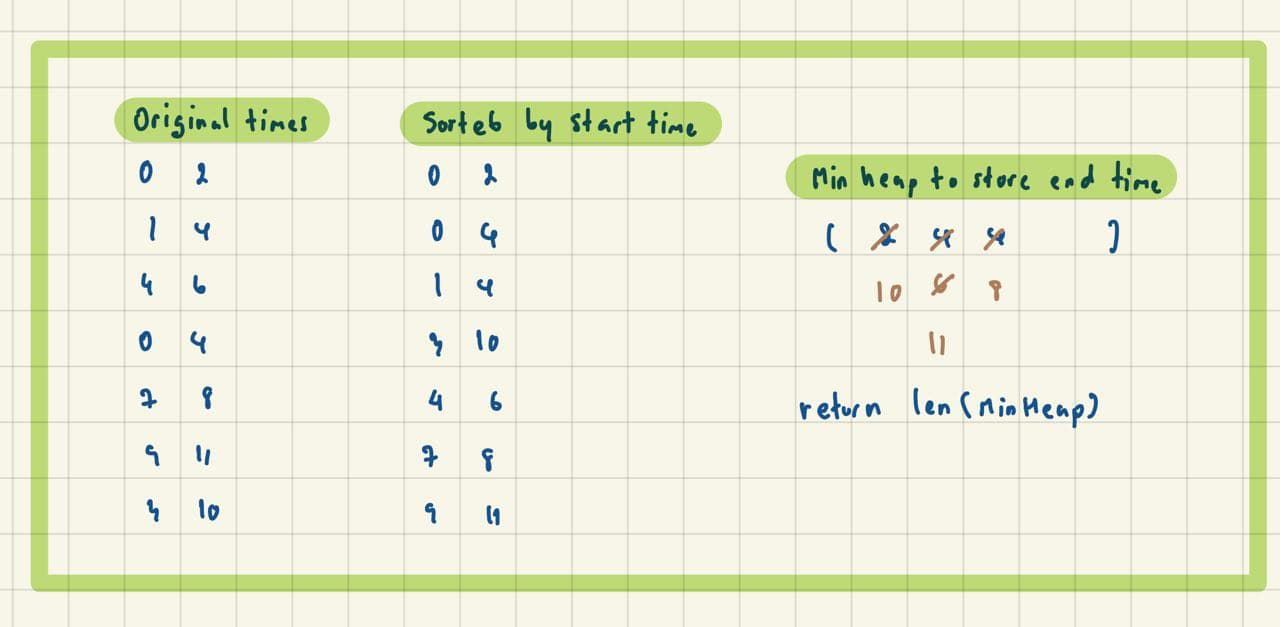

# Solution 3

In [ ]:
# Time O(nlog(n))
# Space O(n)

def laptopRentals(times):
	used_labtops = 0
	start_times = sorted([interval[0] for interval in times])
	end_times = sorted([interval[1] for interval in times])

	start_idx = 0
	end_idx = 0
	
	while start_idx <= len(times) - 1:
		if start_times[start_idx] >= end_times[end_idx]:
			used_labtops -= 1
			end_idx += 1
		used_labtops += 1
		start_idx += 1
	return used_labtops

In [ ]:
times = [
  [0, 2],
  [1, 4],
  [4, 6],
  [0, 4],
  [7, 8],
  [9, 11],
  [3, 10],
]
laptopRentals(times)

3

In [ ]:
times = [
    [0, 4],
    [2, 3],
    [2, 3],
    [2, 3]
  ]
laptopRentals(times)

4

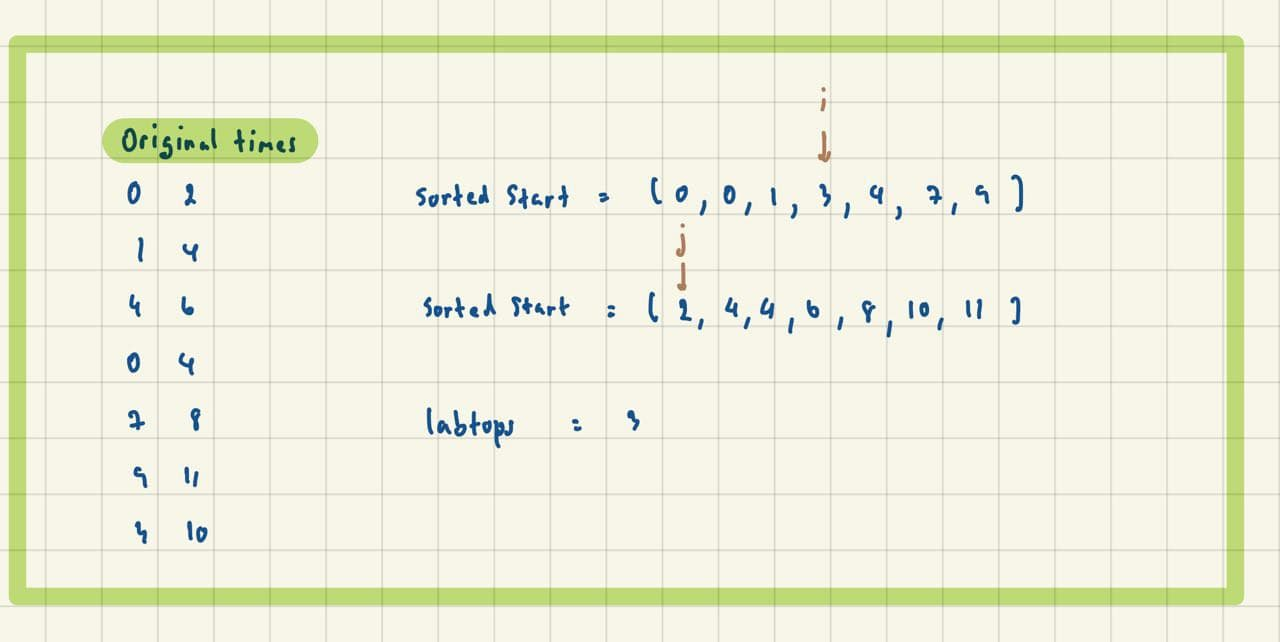